In [109]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.metrics import accuracy_score

In [110]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
gender_data = pd.read_csv('gender_submission.csv')

In [111]:
train_data.shape

(891, 12)

In [112]:
test_data.shape

(418, 11)

In [113]:
dataset = train_data.append(test_data, ignore_index = True )

/Users/davidkolb/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [114]:
dataset.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


<IPython.core.display.Javascript object>


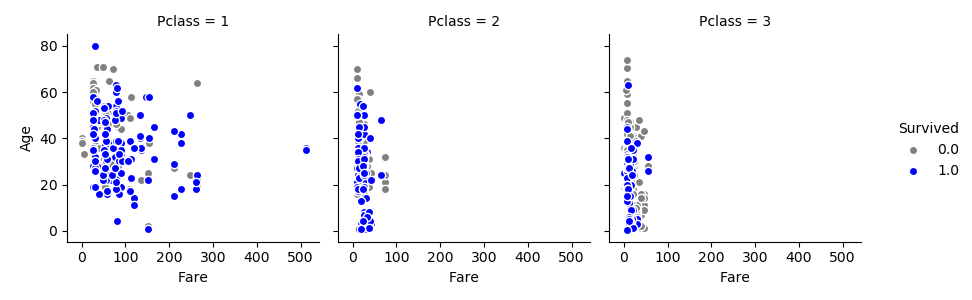

In [115]:
g = sns.FacetGrid(dataset, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"blue", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

<IPython.core.display.Javascript object>


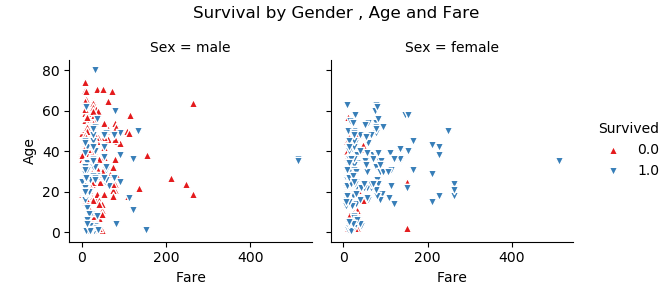

In [116]:
g = sns.FacetGrid(dataset, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare');

<IPython.core.display.Javascript object>


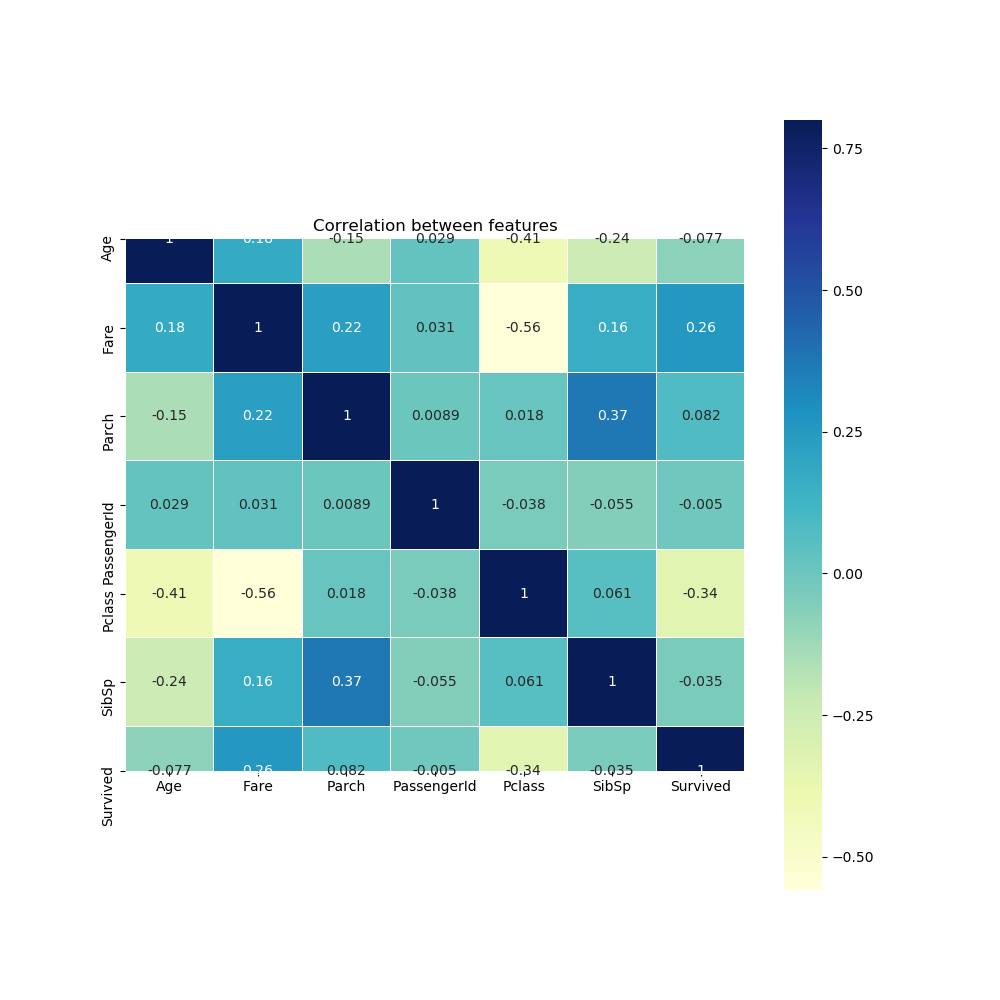

In [103]:
corr=dataset.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [117]:
# Missing Values
dataset.isnull().sum(axis = 0)

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [118]:
dataset.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [105]:
# print data info, note significant gaps in the cabin then age NaN entries.
print('\nTrain Data\n')
dataset.info()


Train Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [119]:
dataset.drop('Cabin', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset['Embarked'].fillna( method ='ffill', inplace = True)
dataset['Fare'].fillna( method ='ffill', inplace = True)
dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
dataset['Pclass'] = dataset['Pclass'].astype('category')

In [121]:
# Find Ages with Random Forest
age_df = dataset[['Age', 'Fare', 'Parch', 'SibSp','Pclass']]
# Split sets into train and test
train  = age_df.loc[ (dataset.Age.notnull()) ]# known Age values
test = age_df.loc[ (dataset.Age.isnull()) ]# null Ages

# All age values are stored in a target array
y = train.values[:, 0]

# All the other values are stored in the feature array
X = train.values[:, 1::]

# Create and fit a model
rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
rtr.fit(X, y)

# Use the fitted model to predict the missing values
predictedAges = rtr.predict(test.values[:, 1::])

# Assign those predictions to the full data set
dataset.loc[ (dataset.Age.isnull()), 'Age' ] = predictedAges 

In [122]:
# print data info, note significant gaps in the cabin then age NaN entries.
print('\nTrain Data\n')
dataset.info()


Train Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age            1309 non-null float64
Embarked       1309 non-null object
Fare           1309 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null category
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: category(1), float64(3), int64(4), object(2)
memory usage: 93.5+ KB


In [ ]:
#y_train = pd.DataFrame(train_data['Survived'], columns=['Survived'])
y_train = pd.DataFrame(train_data['Survived'])
X_train = train_data
X_train.drop('Survived', axis=1, inplace=True)

In [ ]:
X_train = pd.get_dummies(X_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#Setup Models 
kfold = StratifiedKFold(n_splits=10)
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
acc_scores = pd.DataFrame(columns=['Model','Accuracy'])

In [ ]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train.values.ravel(), scoring = 'accuracy', cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
    
cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValerrors': cv_std,'Algorithm':['DecisionTree','RandomForest']})


In [ ]:
cv_res.sort_values(by='CrossValMeans', ascending=False)

In [ ]:
# Run Random Forest Model
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train.values.ravel())
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
acc_scores = acc_scores.append({'Model': 'Random Forest Base', 'Accuracy':acc_rf}, ignore_index=True)

In [ ]:
# Run DTC Model
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train.values.ravel())
pred_dt = dt_clf.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)
acc_scores = acc_scores.append({'Model': 'Decision Tree Base', 'Accuracy':acc_dt}, ignore_index=True)

In [ ]:
dt_clf

In [ ]:
acc_scores.sort_values(by='Accuracy', ascending=False)

In [ ]:
# Random Forest Tuning
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train.values.ravel())

In [ ]:
rf_random.best_score_

In [ ]:
rf_random.best_estimator_.fit(X_train, y_train.values.ravel())
pred_rf = rf_random.best_estimator_.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
acc_scores = acc_scores.append({'Model': 'Random Forest(Tune)', 'Accuracy':acc_rf}, ignore_index=True)

In [ ]:
# Decision Tree Grid for RandomizedSearchCV
dtr_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [ ]:
# Decision Tree grid to search for best hyperparameters
dtr_clf = DecisionTreeClassifier()
dtr_random = RandomizedSearchCV(estimator = dtr_clf, param_distributions = dtr_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
dtr_random.fit(X_train, y_train.values.ravel())
dtr_random.best_score_

In [ ]:
dtr_random.best_estimator_.fit(X_train, y_train.values.ravel())
pred_rf = dtr_random.best_estimator_.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
acc_scores = acc_scores.append({'Model': 'Decision Tree (Tune)', 'Accuracy':acc_rf}, ignore_index=True)

In [ ]:
acc_scores.sort_values(by='Accuracy', ascending=False)

In [ ]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_test })
submission.to_csv('DSKsubmission.csv', index=False)

In [ ]:
test_data.shape

In [ ]:
y_test.shape